https://drive.google.com/file/d/1TWSUuVqKZGmCWjwL6QLcWjMI7MpP4sIu/view?usp=drive_link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/team/       # 수정

team.zip


#yolov8 훈련하기 시작

dataset을 저장할 폴더를 만들고 그곳으로 들어갑니다

In [ ]:
%mkdir dataset

In [ ]:
!cp /content/drive/MyDrive/team/team.zip /content/      # 수정
#!cp /content/drive/MyDrive/data/train_team.zip /content/
#!cp /content/drive/MyDrive/data/val_team.zip /content/
#!cp /content/drive/MyDrive/data/test_team.zip /content/

In [ ]:
#!unzip /content/drive/MyDrive/team/team.zip -d /content/dataset/
!unzip /content/team.zip -d /content/dataset/         #   수정
#!unzip /content/drive/MyDrive/team/team.zip -d /content/drive/MyDrive/
#!unzip /content/train_team.zip -d dataset/train/
#!unzip /content/val_team.zip -d dataset/val/
#!unzip /content/test_team.zip -d dataset/test/

Archive:  /content/team.zip
   creating: /content/dataset/team/test/
   creating: /content/dataset/team/test/images/
  inflating: /content/dataset/team/test/images/0684_1999_07_00000049_F.png  
  inflating: /content/dataset/team/test/images/0684_1999_09_00000031_D.png  
  inflating: /content/dataset/team/test/images/0684_1999_13_00000034_F.png  
  inflating: /content/dataset/team/test/images/0684_1999_18_00000015_D.png  
  inflating: /content/dataset/team/test/images/0684_1999_22_00000024_D.png  
   creating: /content/dataset/team/test/labels/
  inflating: /content/dataset/team/test/labels/0684_1999_07_00000049_F.txt  
  inflating: /content/dataset/team/test/labels/0684_1999_09_00000031_D.txt  
  inflating: /content/dataset/team/test/labels/0684_1999_13_00000034_F.txt  
  inflating: /content/dataset/team/test/labels/0684_1999_18_00000015_D.txt  
  inflating: /content/dataset/team/test/labels/0684_1999_22_00000024_D.txt  
   creating: /content/dataset/team/train/
   creating: /content/d

In [ ]:
#%cd dataset

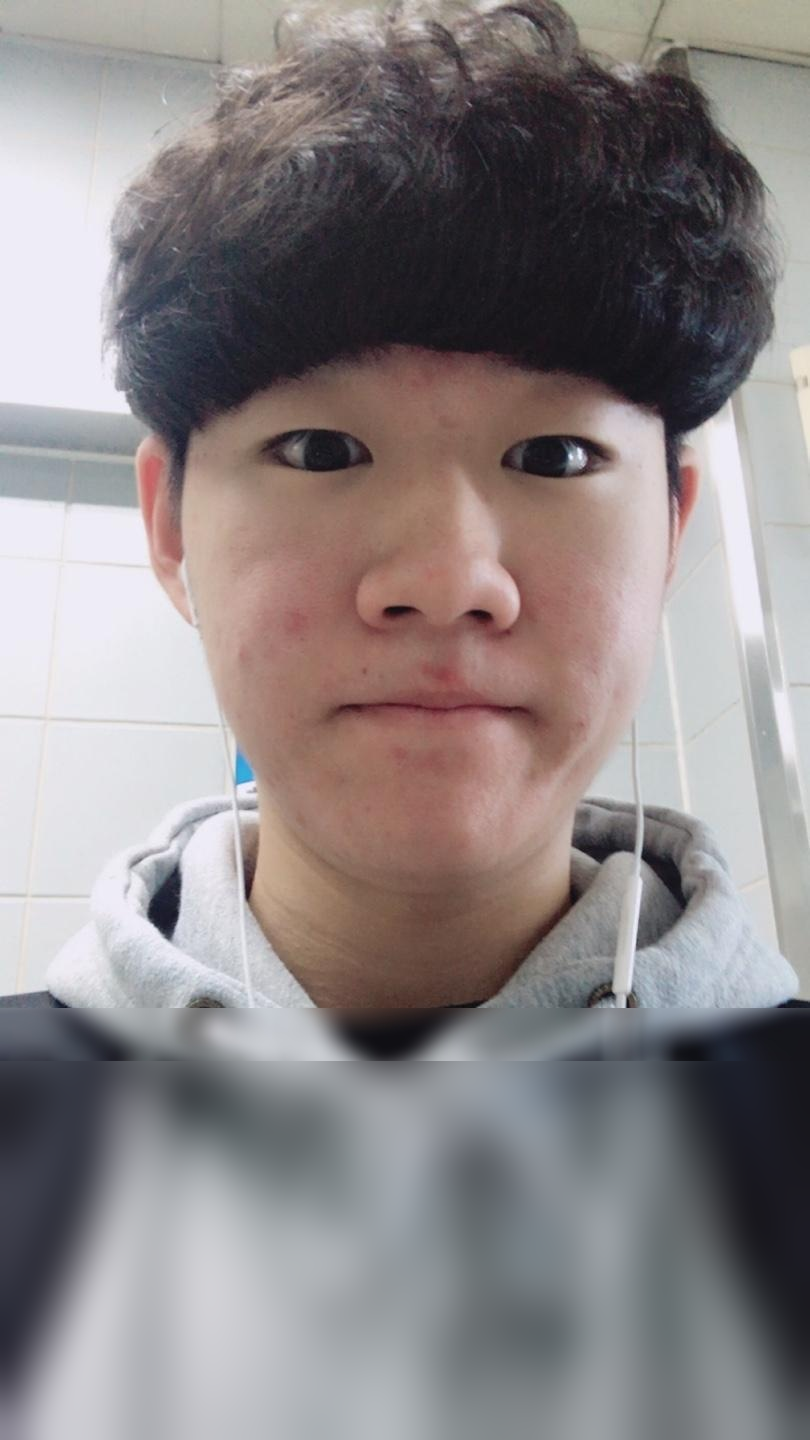

In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
import random


# 이미지 파일 경로를 가져오기
#image_paths = glob.glob('/content/drive/MyDrive/team/test/images/*.jpg')
#image_paths = glob.glob('/content/dataset/team/test/images/*.jpg')
image_paths = glob.glob('/content/dataset/team/test/images/*.png')       # 수정

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    cv2_imshow(img)

해당경로에 이미지와 data.yaml이 나온것을 확인 할 수 있습니다

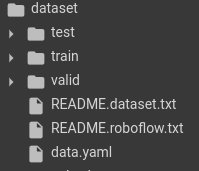

data.yaml을 확인합니다

In [ ]:
#%cat data.yaml

새로운 yaml파일을 만들고 train, val, test 데이터셋 경로가 올바른게 작성해줘야 합니다



```
변경전                       변경후
train: ../train/images  ->  'train' : '/content/dataset/train/images'
```



In [ ]:
import yaml

data = {'train' : '/content/dataset/team/train/images',
        'test' : '/content/dataset/team/test/images',
        'val' : '/content/dataset/team/valid/images',
        'nc': 1,
        'names': ['cls_name']                        # 수정
}

with open('/content/dataset/team/custom_data.yaml', 'w') as f:
  yaml.dump(data, f)

custom_data.yaml 파일을 만들었으니 제대로 작성이 되었는지 확인합니다

In [ ]:
with open('/content/dataset/team/custom_data.yaml', 'r') as f:     # 수정
  view_yaml = yaml.safe_load(f)
  display(view_yaml)


{'names': ['cls_name'],
 'nc': 1,
 'test': '/content/dataset/team/test/images',
 'train': '/content/dataset/team/train/images',
 'val': '/content/dataset/team/valid/images'}

yolov8을 인스톨합니다

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

yolov8이 제대로 설치가 되었는지 확인합니다

In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/235.7 GB disk)


사전에 학습된 yolov8n.pt를 가져오고 적용시킵니다

yolov8의 학습파일은 yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt 등이 있습니다

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 126MB/s]


yolov8에서 사용하는 model이 yolov8n.pt 인지 확인해봅니다

yolov8은 cocodata의 분류를 가져서 80개의 name이 저장되어있습니다

In [ ]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

우리가 원하는 데이터셋 경로를 가진 custom_data.yaml을 가지고 학습을 시작합니다

In [ ]:
#model.train(data='/content/drive/MyDrive/team/custom_data.yaml', epochs= 25, patience = 20, batch=32, imgsz =416)
model.train(data='/content/dataset/team/custom_data.yaml', epochs= 1, patience = 20, batch=2)     # 수정

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/team/custom_data.yaml, epochs=1, time=None, patience=20, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/team/train/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 39.44it/s]

train: New cache created: /content/dataset/team/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/team/valid/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 233.08it/s]

val: New cache created: /content/dataset/team/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1     0.623G      1.954      4.235      2.185          1        640: 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


                   all          5          5      0.002        0.6    0.00204   0.000467

1 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.21it/s]


                   all          5          5      0.002        0.6    0.00203   0.000466
Speed: 0.4ms preprocess, 10.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e903bbdf400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

학습한 결과 분석은 다음경로에 새롭게 저장되었습니다

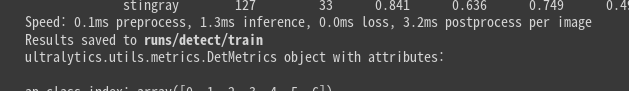

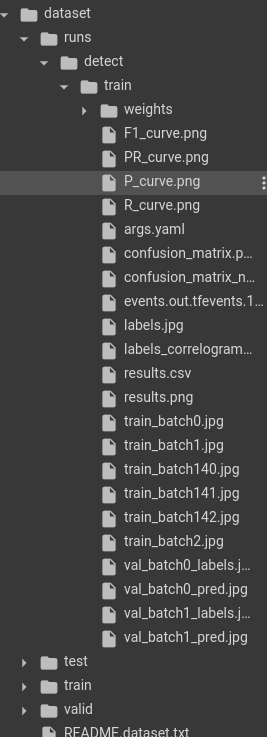

학습한 모델은 weights/best.pt 로 저장되어있습니다

yolov8은 학습하고 나서 자동적으로 모델을 변경합니다

실제로 변경되는지 확인합니다

In [ ]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 1
{0: 'cls_name'}


학습된 결과물을 출력하는 부분입니다

마지막 출력문인 'Results saved to '이후에 나오는 경로가 학습된 이미지 출력이 있는 폴더의 경로입니다

image.png

In [ ]:
results = model.predict(source ='/content/dataset/team/test/images/', save=True)    # 수정


image 1/5 /content/dataset/team/test/images/0684_1999_07_00000049_F.png: 640x288 (no detections), 95.5ms
image 2/5 /content/dataset/team/test/images/0684_1999_09_00000031_D.png: 480x640 (no detections), 62.9ms
image 3/5 /content/dataset/team/test/images/0684_1999_13_00000034_F.png: 640x512 (no detections), 61.3ms
image 4/5 /content/dataset/team/test/images/0684_1999_18_00000015_D.png: 640x384 (no detections), 57.2ms
image 5/5 /content/dataset/team/test/images/0684_1999_22_00000024_D.png: 640x640 (no detections), 8.0ms
Speed: 2.1ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train2


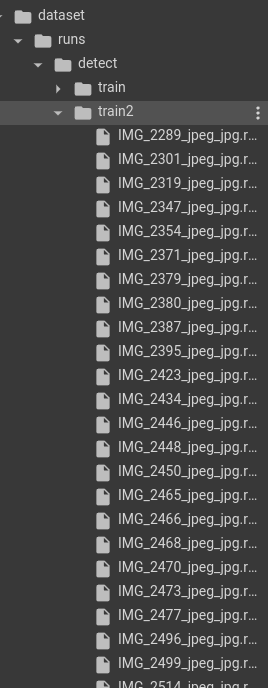

해당 경로에서 랜덤으로 이미지 출력을 보는 코드입니다

colab은 특수한 패키지를 사용해야 볼 수 있습니다

In [ ]:
# 이미지 파일 경로를 가져오기
image_paths = glob.glob('/content/dataset/runs/detect/train/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    cv2_imshow(img)

이미지 파일이 없습니다.


만약 실제로 학습한 데이터를 자신의 드라이브에 저장하고 싶다면

In [ ]:
%cp runs/detect/train/weights/best.pt /content/drive/MyDrive/team      # 수정